<a href="https://colab.research.google.com/github/charlie-aashutosh/OpenCV---Charile/blob/master/Image_Blending_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics

In [15]:
#importing necessary packages
import numpy as np
import pandas as pd
import cv2 as cv  # import opencv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

Since Colab has a Linux OS so when we do some extra functionalities like downloading an image etc then we need to give the exact same terminal command which is "wget" and this stands for "webget". When we download something from the internet, we use this linux command

In [16]:

# download image from the URL
!wget "https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg" -O messi5.jpg

--2021-03-29 09:27:27--  https://raw.githubusercontent.com/abidrahmank/OpenCV2-Python-Tutorials/master/data/messi5.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72937 (71K) [image/jpeg]
Saving to: ‘messi5.jpg’

messi5.jpg          100%[===================>]  71.23K  --.-KB/s    in 0.01s   

2021-03-29 09:27:28 (5.00 MB/s) - ‘messi5.jpg’ saved [72937/72937]



In [17]:
#this command is usually used to check if the download was proper or not.
!ls -l


total 108
-rw-r--r-- 1 root root 72937 Mar 29 09:27 messi5.jpg
-rw-r--r-- 1 root root 30128 Feb 25  2016 opencv_logo.png
drwxr-xr-x 1 root root  4096 Mar 18 13:36 sample_data


Images comprise of small pixels and there are associated pixel values for 3 colour channel -BGR

The pixel value ranges in between 0-255 where 0 represents complete black and 255 denotes white

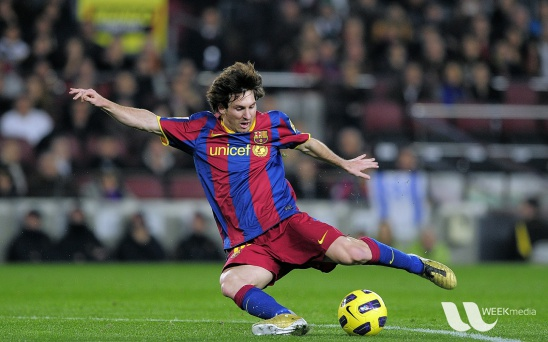

In [18]:
img1 = cv.imread('messi5.jpg')  
cv2_imshow(img1)

The first value of shape denotes the height of the image, 2nd value shows the width and third parameter is for 3 colour channel i.e BGR

In [19]:
print(img1.shape)

(342, 548, 3)


The following code shows the pixel at 100 ht and 100 width location, the values of BGR can be easily found here, 157 is for blue, 166 for green and 200 for blue

In [20]:
print(img1[100,100])

[157 166 200]


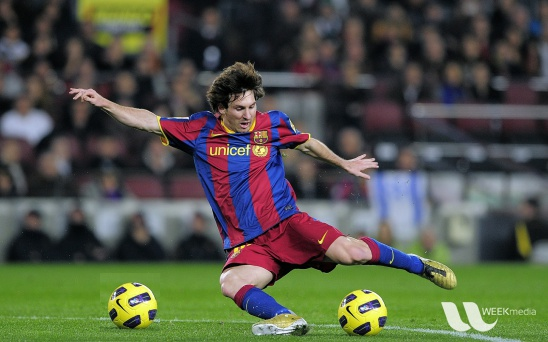

In [21]:
# add another ball to the image
#lets give the range of height and range of width that has to be copied from the original image
ball = img1[280:340, 330:390]
img1[273:333, 100:160] = ball

cv2_imshow(img1)

How is an image represented by a computer?
- Zoom-in till you see individual pixels
- Three Matrices of pixels for R, G and B

 <font color='lightgreen'>**IDEA: We can apply Matrix Algebra operations (addition, subtraction, multiplication) on images.**  </font>


In [22]:
# downlaod another image opencv_logo
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png -O opencv_logo.png

--2021-03-29 09:27:31--  https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/OpenCV_Logo_with_text.png/487px-OpenCV_Logo_with_text.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30128 (29K) [image/png]
Saving to: ‘opencv_logo.png’

opencv_logo.png     100%[===================>]  29.42K  --.-KB/s    in 0.05s   

2021-03-29 09:27:32 (612 KB/s) - ‘opencv_logo.png’ saved [30128/30128]



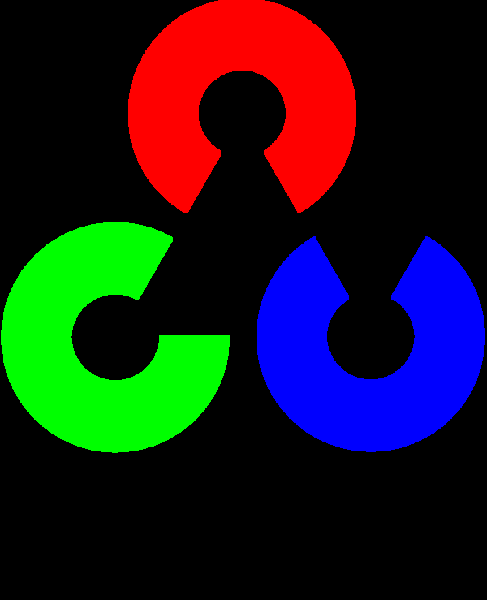

In [23]:
img2 = cv.imread('opencv_logo.png')
cv2_imshow(img2)

In [24]:
print(img2.shape)

(600, 487, 3)


### Simple Math behind Image Blending: 
<font color='lightgreen'> Image Blending = Weighted addition of matrices </font>

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_core/py_image_arithmetics/py_image_arithmetics.html#image-arithmetics

In [25]:
dst = cv.addWeighted(img1,0.7,img2,0.3,0)

error: ignored

The code written above threw us an error because while we are doing the weighted sum of matrices, the size of both the images should be same i.e f1 and f0 should be same. So we first need to do that and then image blending is possible

(342, 548, 3)


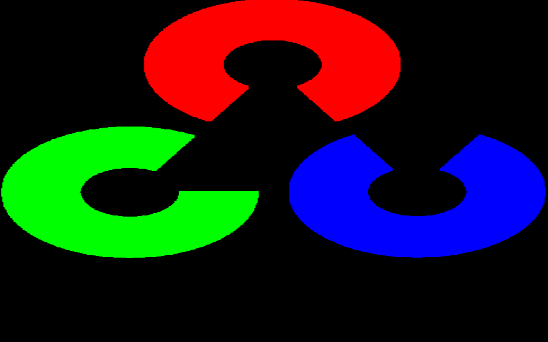

In [26]:
img2a = cv.resize(img2, (548, 342)) # resizing opencv logo to be the same size as messi
print(img2a.shape)
cv2_imshow(img2a)

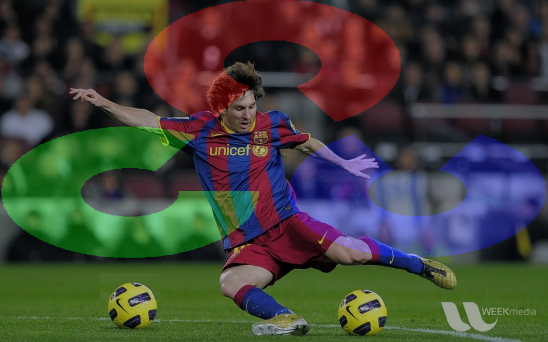

In [27]:
# Refer to documentation: https://docs.opencv.org/master/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19
dst = cv.addWeighted(img1,0.7,img2a,0.3,0)
cv2_imshow(dst)

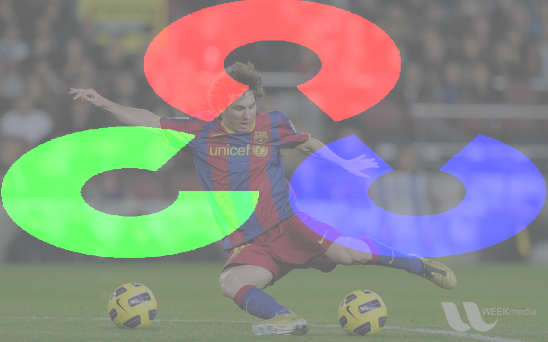

In [28]:
dst = cv.addWeighted(img1,0.3,img2a,0.7,100)
cv2_imshow(dst)